# Pandas

The pandas module is one of the most powerful tools for data analysis.  Pandas was designed to work with tabular and heterogeneous data.  The original author of pandas is Wes McKinney, so it makes sense that most of his book "Python for Data Analysis" covers the functionality of pandas. In fact, chapters 5 - 11 are basically about what pandas can do.  

Here are some of the things that I hope you can do by the end of the section:
* Create Series and DataFrames (ch 5)
* Index, slice, and filter (ch 5)
* Examine your data (ch 5)
* Compute summarization and descriptive statistics (ch 5)
* Drop rows and columns (ch 5)
* Create columns (ch 5)
* Count the number of missing values (ch 7)
* Drop or fill missing values (ch 7)
* Drop duplicate rows (ch 7)
* Combine categories of categorical data (ch 7)
* Discretize numerical data (ch 7)
* Have some practice with hierarchical indexing (ch 8)
* Reset the index (ch 8)
* Merge and concatenate DataFrames (ch 8)
* Simple plots with pandas (ch 9)
* Use .groupby() for category aggregation (ch 10)
* Fill missing values by group summary statistics (ch 10)

## Importing Pandas

It is standard to use the alias ``pd`` when importing pandas.
~~~
import pandas as pd
~~~
I usually import numpy at the same time since pandas and numpy are often used in tandem.

In [12]:
# Import Pandas library
import pandas as pd
import numpy as np

In [13]:
# Note: you can install pandas within the notebook:
# !pip install pandas
# OR
# !conda install pandas

In [14]:
# Try:  Create a Series from a list
x = [1,2,3,4,5]
lab = ['a','b','c','d','e']

s = pd.Series(x, index=lab)
print(s)

a    1
b    2
c    3
d    4
e    5
dtype: int64


In [15]:
# Creating a Series with a dictionary

d = pd.Series({'a': 1, 'b': 2, 'c': 3})
print(d)

a    1
b    2
c    3
dtype: int64


## DataFrames
DataFrames are the main data structure of pandas and were directly inspired by the R programming language.  DataFrames are a bunch of Series objects put together to share the same (row) index.  A DataFrame has both a row and a column index.  

## Creating DataFrames
DataFrames can also be created from lists, dictionaries, or numpy arrays.
Syntax: pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=None)


In [16]:
x = [[1, 2, 3],
     ['a', 'b', 'c'],
     [4, 5, 6]]

x_df = pd.DataFrame(x, columns = ['p', 'd', 'q'], index = ['x', 'y', 'z'])
print(x_df)

   p  d  q
x  1  2  3
y  a  b  c
z  4  5  6


In [17]:
# Create a simple DataFrame
data = {'Name': ['Alice', 'Bob', 'Charlie'],
        'Age': [25, 30, 35],
        'Salary': [50000, 60000, 75000]}

df = pd.DataFrame(data)

# Display the DataFrame
df

,Name,Age,Salary
0,Alice,25,50000
1,Bob,30,60000
2,Charlie,35,75000


In [18]:
# Accessing specific columns
names = df['Name']
ages = df['Age']

# Accessing a specific row
row = df.loc[1]

# Accessing a specific element
salary = df.at[2, 'Salary']


In [19]:
# Display the results
print("Names: \n", names)


Names: 
 0      Alice
1        Bob
2    Charlie
Name: Name, dtype: object


In [20]:
print("Ages: \n", ages)

Ages: 
 0    25
1    30
2    35
Name: Age, dtype: int64


In [21]:
print("Row 1: \n", row)

Row 1: 
 Name        Bob
Age          30
Salary    60000
Name: 1, dtype: object


In [22]:
print("Charlie's Salary:", salary)

Charlie's Salary: 75000


In [23]:
# Add a new column calculated from existing columns
df['Birth Year'] = 2023 - df['Age']

# Display the DataFrame with the new column
df.head()


,Name,Age,Salary,Birth Year
0,Alice,25,50000,1998
1,Bob,30,60000,1993
2,Charlie,35,75000,1988


In [24]:
# Sort the DataFrame by Age in descending order
df_sorted = df.sort_values(by='Birth Year', ascending=True)

# Display the sorted DataFrame
df_sorted.head()


,Name,Age,Salary,Birth Year
2,Charlie,35,75000,1988
1,Bob,30,60000,1993
0,Alice,25,50000,1998


## Read in some practice data

pd.read_csv can be used to load in external .csv files  
We can access a summary of the data using df.info()  
We can use df.head() to view the first view entries  

In [25]:
## Iris data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
iris = pd.read_csv(url, names=['sepal_length','sepal_width', 'petal_length', 'petal_width', 'class'])

## Looking at your DataFrame

``df.head()``  
``df.tail()``  
``df.shape``  
``df.info()``  
``df.describe()``   
``df.columns``

In [26]:
iris.shape

(150, 5)

In [27]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'], dtype='object')

In [28]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [29]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [30]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [31]:
# Rename columns
iris.rename(columns={'class': 'species'}, inplace=True)

# Display the DataFrame with renamed columns
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Basic Plotting
Pandas can be used for basic plotting, but we will cover more later

<Axes: ylabel='Frequency'>

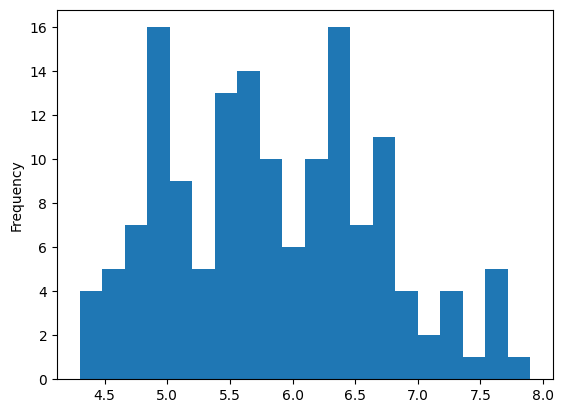

In [32]:
iris['sepal_length'].plot.hist(bins=20)

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

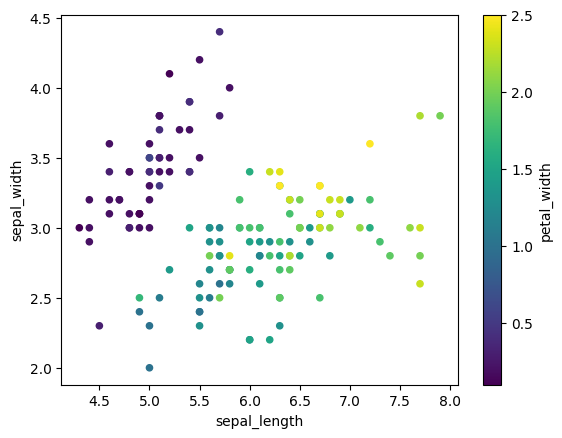

In [33]:
iris.plot.scatter('sepal_length','sepal_width', c='petal_width')

<Axes: >

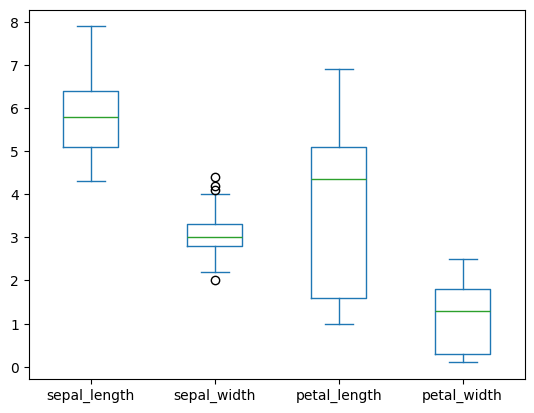

In [34]:
iris.plot.box()

<Axes: ylabel='Density'>

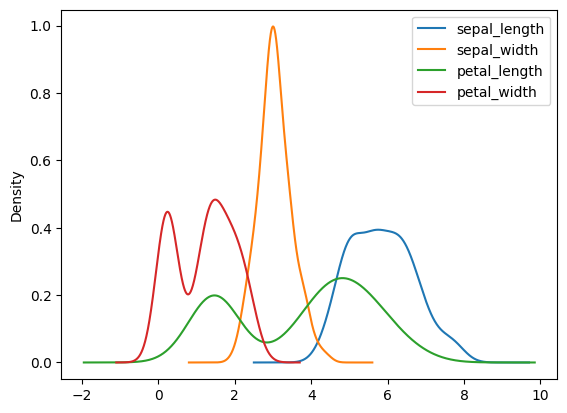

In [35]:
iris.plot.kde()

---

## Selection and Indexing

There are various ways to get subsets of the data.  In the following ``df`` refers to a DataFrame.

#### Selecting columns
One column (producing a Series)
~~~
df['column_name']   #This is the recommended version
df.column_name
~~~
---

Multiple columns (producing a DataFrame)
~~~
df[['column_name']] # this will produce a DataFrame
df[['col1', 'col2', 'col3']]
~~~
---

#### Selecting row and columns with ``loc`` and ``iloc``
~~~
df.loc['row_name', 'col_name']
df.iloc['row index', 'col index']
~~~

``loc`` and ``iloc`` also support slicing.  Note: when slicing with ``loc``, the end point IS including (but not when slicing with ``iloc``.

---
~~~
df.loc['row_name1':'row_name2', 'col_name1':'col_name2']
df.loc[:, 'col_name1':'col_name2']
df.loc['r1':'r2', :]
df.loc[['r1','r2','r3'],['c1','c2]]
~~~
*When using `.loc()`, `row_name2` and `col_name2` WILL be included*

---
~~~
df.iloc[index1:index2, col1:col2]
~~~
*When using `.iloc()`, `index2` and `col2` will NOT be included*

---
#### Selecting rows based on column condition
~~~
df[df[boolean condition]]

df[mask]
~~~


In [36]:
iris.loc[0:5, ['petal_width', 'petal_length']]

,petal_width,petal_length
0,0.2,1.4
1,0.2,1.4
2,0.2,1.3
3,0.2,1.5
4,0.2,1.4
5,0.4,1.7


In [37]:
iris.iloc[0:2, 0:]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


In [38]:
iris['sepal_length'] > 6

,sepal_length
0,False
1,False
2,False
3,False
4,False
...,...
145,True
146,True
147,True
148,True


In [39]:
## Slicing with a boolean series
iris[iris['sepal_length'] > 6]

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor
56,6.3,3.3,4.7,1.6,Iris-versicolor
...,...,...,...,...,...
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica


In [40]:
# Filter data using multiple conditions (Note the parentheses!)
filtered_iris = iris[(iris['sepal_length'] > 6) & (iris['petal_length'] > 5)]

# Display the filtered data
filtered_iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,Iris-virginica
102,7.1,3.0,5.9,2.1,Iris-virginica
103,6.3,2.9,5.6,1.8,Iris-virginica
104,6.5,3.0,5.8,2.2,Iris-virginica
105,7.6,3.0,6.6,2.1,Iris-virginica


In [41]:
# Reset to default 0,1...n index
filtered_iris.reset_index(drop = True).head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,6.3,3.3,6.0,2.5,Iris-virginica
1,7.1,3.0,5.9,2.1,Iris-virginica
2,6.3,2.9,5.6,1.8,Iris-virginica
3,6.5,3.0,5.8,2.2,Iris-virginica
4,7.6,3.0,6.6,2.1,Iris-virginica


## Multi-Index and Index Hierarchy

Let us go over how to work with Multi-Index, first we'll create a quick example of what a Multi-Indexed DataFrame would look like:

In [42]:
# Index Levels
outside = ['G1','G1','G1','G2','G2','G2']
inside = [1,2,3,1,2,3]
hier_index = list(zip(outside,inside))
hier_index = pd.MultiIndex.from_tuples(hier_index)

In [43]:
hier_index

MultiIndex([('G1', 1),
            ('G1', 2),
            ('G1', 3),
            ('G2', 1),
            ('G2', 2),
            ('G2', 3)],
           )

In [44]:
df = pd.DataFrame(np.random.randn(6,2),index=hier_index,columns=['A','B'])
df

A         B
G1 1  0.882746 -1.048559
   2  0.146989  0.937726
   3 -0.112926 -1.027235
G2 1 -0.502181  0.988041
   2  0.809004  0.447198
   3 -0.045557  1.456790

Now let's show how to index this! For index hierarchy we use df.loc[], if this was on the columns axis, you would just use normal bracket notation df[]. Calling one level of the index returns the sub-dataframe:

In [45]:
df.loc['G1']

,A,B
1,0.882746,-1.048559
2,0.146989,0.937726
3,-0.112926,-1.027235


In [46]:
df.loc['G1'].loc[1]

,1
A,0.882746
B,-1.048559


In [47]:
df.index.names

FrozenList([None, None])

In [48]:
df.index.names = ['Group','Num']

In [49]:
df

A         B
Group Num                    
G1    1    0.882746 -1.048559
      2    0.146989  0.937726
      3   -0.112926 -1.027235
G2    1   -0.502181  0.988041
      2    0.809004  0.447198
      3   -0.045557  1.456790

In [50]:
# The xs() method in pandas is used to extract a cross-section from a DataFrame or Series
df.xs('G1')

,A,B
Num,,
1,0.882746,-1.048559
2,0.146989,0.937726
3,-0.112926,-1.027235


## Methods for computing summary and descriptive statistics
pandas objects have many reduction / summary statistics methods that extract a single value from the rows or columms of a DataFrame.  See Table 5-8 in *Python for Data Analysis* for a more complete list, but here are a few that are commonly used.

`count`: number of non-NA values   
`describe`: summary statistics for numerical columns   
`min`, `max`: min and max values  
`argmin`, `argmax`: index of min and max values (for Series only)   
`idxmin`, `idxmax`: index or column name of min and max values  
`sum`: sum of values  
`cumsum` : cummulative sum
`mean`: mean of values  
`quantile`: quantile from 0 to 1 of values  
`var`: (sample) variance of values  
`std`: (sample) standard deviation of values  
`df.corr()` and `df.cov()` will produce the correlation or covariance matrix.  Or two Series can be used to get the correlation (or covariance) with `Series1`.corr(`Series2`).

Numpy functions can also be used: `np.corrcoef()`

Most of these functions also take an `axis` argument which specifies whether to reduce over rows or columns: 0 for rows and 1 for columns.   
There is also an argument `skipna` which specifies whether or not to skip missing values.  The default is True.


In [51]:
iris.sepal_length.argmin()

13

In [52]:
iris.cumsum()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,10.0,6.5,2.8,0.4,Iris-setosaIris-setosa
2,14.7,9.7,4.1,0.6,Iris-setosaIris-setosaIris-setosa
3,19.3,12.8,5.6,0.8,Iris-setosaIris-setosaIris-setosaIris-setosa
4,24.3,16.4,7.0,1.0,Iris-setosaIris-setosaIris-setosaIris-setosaIr...
...,...,...,...,...,...
145,851.6,446.2,543.1,171.8,Iris-setosaIris-setosaIris-setosaIris-setosaIr...
146,857.9,448.7,548.1,173.7,Iris-setosaIris-setosaIris-setosaIris-setosaIr...
147,864.4,451.7,553.3,175.7,Iris-setosaIris-setosaIris-setosaIris-setosaIr...
148,870.6,455.1,558.7,178.0,Iris-setosaIris-setosaIris-setosaIris-setosaIr...


## Unique values and value counts

``df.nunique()`` or ``df['column'].nunique()``  

``df.value_counts()`` or ``df['column'].value_counts()``

In [53]:
iris.nunique()

,0
sepal_length,35
sepal_width,23
petal_length,43
petal_width,22
species,3


In [54]:
iris.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

`df.corr()` and `df.cov()` will produce the correlation or covariance matrix.  Or two Series can be used to get the correlation (or covariance) with `Series1`.corr(`Series2`).

Numpy functions can also be used: `np.corrcoef()`

In [55]:
iris.corr(numeric_only = True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


---
## Dropping rows and columns

Columns and rows can be dropped with the `.drop()` method (using `axis=1` for columns and `axis=0` (default) for rows).  This method creates a new object unless `.inplace = True` is specified.

The `del` command can also be used to drop columns in place.

In [56]:
no_species = iris.drop('species', axis = 1)
no_species.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [57]:
# The original is unchanged if inplace = False
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Adding columns

Add a new column to the end of a data frame
~~~
df['new_col'] = value
~~~

Add a new column at a specific index

`.insert(col_index, 'new_col_name', value(s))`

In [58]:
iris['sum_petal_dims'] = iris['petal_length'] + iris['petal_width']

In [59]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sum_petal_dims
0,5.1,3.5,1.4,0.2,Iris-setosa,1.6
1,4.9,3.0,1.4,0.2,Iris-setosa,1.6
2,4.7,3.2,1.3,0.2,Iris-setosa,1.5
3,4.6,3.1,1.5,0.2,Iris-setosa,1.7
4,5.0,3.6,1.4,0.2,Iris-setosa,1.6


## Using Apply

In [60]:
iris['sepal_length'].apply(np.log)

,sepal_length
0,1.629241
1,1.589235
2,1.547563
3,1.526056
4,1.609438
...,...
145,1.902108
146,1.840550
147,1.871802
148,1.824549


In [61]:
# What happened?
iris['sepal_length'].apply(np.mean)

,sepal_length
0,5.1
1,4.9
2,4.7
3,4.6
4,5.0
...,...
145,6.7
146,6.3
147,6.5
148,6.2


In [62]:
iris.iloc[:, 0:4].apply(np.mean)

,0
sepal_length,5.843333
sepal_width,3.054000
petal_length,3.758667
petal_width,1.198667


In [63]:
iris['species'].apply(lambda x: x.title())

,species
0,Iris-Setosa
1,Iris-Setosa
2,Iris-Setosa
3,Iris-Setosa
4,Iris-Setosa
...,...
145,Iris-Virginica
146,Iris-Virginica
147,Iris-Virginica
148,Iris-Virginica


In [64]:
iris['species'].str.lower()

,species
0,iris-setosa
1,iris-setosa
2,iris-setosa
3,iris-setosa
4,iris-setosa
...,...
145,iris-virginica
146,iris-virginica
147,iris-virginica
148,iris-virginica


In [65]:
def zero_one_scale(x):
    return (x - np.min(x)) / (np.max(x)- np.min(x))

In [66]:
## Why does this not work?
iris['sepal_length'].apply(zero_one_scale)

<ipython-input-65-cfca52563fac>:2: RuntimeWarning: invalid value encountered in scalar divide
  return (x - np.min(x)) / (np.max(x)- np.min(x))


,sepal_length
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
145,NaN
146,NaN
147,NaN
148,NaN


In [67]:
## Why does this not work?
iris['petal_length'].apply(lambda x: zero_one_scale(x))

<ipython-input-65-cfca52563fac>:2: RuntimeWarning: invalid value encountered in scalar divide
  return (x - np.min(x)) / (np.max(x)- np.min(x))


,petal_length
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
145,NaN
146,NaN
147,NaN
148,NaN


In [68]:
zero_one_scale(iris.petal_length)

,petal_length
0,0.067797
1,0.067797
2,0.050847
3,0.084746
4,0.067797
...,...
145,0.711864
146,0.677966
147,0.711864
148,0.745763


## Missing Values

**Ways to count missing values**
~~~
df.info()
df.isna().sum()
df.isna().sum(axis=0)
~~~

**Drop missing values with `.dropna()`**

Calling `.dropna()` without any arguments will drop all rows with missing values

Arguments:
* `axis=1` will drop columns with missing values (default is `axis=0`)
* `how='all'` will drop rows (or columns) if all the values are NA (default is `how='any'`)
* `subset=` will limit na search to these specic columns (or indexes)
    

**Fill missing values with `.fillna()`**
Arguments:
* `value`: value used to fill.
* `method'`: methods used to fill (forward or backward fill)


In [69]:
# Creating a DataFrame with missing values
missing_data = {'A': [1, 2, np.nan],
        'B': [np.nan, 4, 6],
        'C': [7, 8, 9]}

m_df = pd.DataFrame(missing_data)
m_df

,A,B,C
0,1.0,NaN,7
1,2.0,4.0,8
2,NaN,6.0,9


In [70]:
m_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       2 non-null      float64
 1   B       2 non-null      float64
 2   C       3 non-null      int64  
dtypes: float64(2), int64(1)
memory usage: 204.0 bytes


In [71]:
# Check for missing values
m_df.isna()

,A,B,C
0,False,True,False
1,False,False,False
2,True,False,False


In [72]:
# Check how many missing values
m_df.isna().sum()

,0
A,1
B,1
C,0


In [73]:
# Check how many missing values
m_df.isna().sum(axis = 1)

,0
0,1
1,0
2,1


In [74]:
# Fill missing values
df_filled = m_df.fillna(-1)
df_filled

,A,B,C
0,1.0,-1.0,7
1,2.0,4.0,8
2,-1.0,6.0,9


In [75]:
m_df

,A,B,C
0,1.0,NaN,7
1,2.0,4.0,8
2,NaN,6.0,9


In [76]:
# Fill with mean column value
m_df.fillna(m_df.mean())

,A,B,C
0,1.0,5.0,7
1,2.0,4.0,8
2,1.5,6.0,9


In [77]:
# Remove rows with missing values
df_dropped = m_df.dropna()

# Display the cleaned DataFrame
df_dropped

,A,B,C
1,2.0,4.0,8


In [78]:
df.head()

A         B
Group Num                    
G1    1    0.882746 -1.048559
      2    0.146989  0.937726
      3   -0.112926 -1.027235
G2    1   -0.502181  0.988041
      2    0.809004  0.447198

In [79]:
# Write DataFrame to a CSV file
df.to_csv('data.csv', index=False)

# Read data from a CSV file
new_df = pd.read_csv('data.csv')

# Display the DataFrame
print(new_df)


          A         B
0  0.882746 -1.048559
1  0.146989  0.937726
2 -0.112926 -1.027235
3 -0.502181  0.988041
4  0.809004  0.447198
5 -0.045557  1.456790


## Groupby, Aggregation

### Use Titanic data example here

In [ ]:
## Titanic data
from sklearn.datasets import fetch_openml
dat = fetch_openml(data_id=40945, parser = 'auto')
titanic = dat.frame

In [ ]:
titanic.head()

In [ ]:
titanic.drop('name', axis = 1, inplace = True)

In [ ]:
# Average age by sex
age_by_sex = titanic.groupby('sex')['age'].mean()

# Display the aggregated data
print("Age By Sex:\n", age_by_sex)


In [ ]:
# Multiple Grouping Categories
titanic.groupby(['sex', 'pclass'])['age'].mean()

In [ ]:
# Multiple Target Variables
titanic.groupby(['sex'])[['age', 'fare']].mean()

In [ ]:
# Multiple Aggregations
titanic.groupby('sex')['age'].agg(['mean', 'max', 'min', 'sum']).round()


In [ ]:
# Define a custom aggregation function
def range(series):
    return series.max() - series.min()

titanic.groupby('sex')['fare'].agg(range)


In [ ]:
# Group data by 'Region' and apply named aggregations to multiple columns
region_summary = titanic.groupby('home.dest').agg(
    total_fare=('fare', 'sum'),
    agerage_fare=('fare', 'mean'),
    average_age=('age', 'mean')
)

# Display the summary for each region
print("Region-wise Summary:\n", region_summary)


In [ ]:
# Need dataset to use concat, merge, etc.; check Shannon's files

In [ ]:
import pandas as pd

# Create two DataFrames
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                    'B': ['B0', 'B1', 'B2']})

df2 = pd.DataFrame({'A': ['A3', 'A4', 'A5'],
                    'B': ['B3', 'B4', 'B5']})

# Concatenate DataFrames vertically
result = pd.concat([df1, df2], axis=0)

# Display the concatenated DataFrame
print("Concatenated DataFrame:\n", result)


In [ ]:
# Create two DataFrames with a common column 'key'
left = pd.DataFrame({'key': ['A', 'B', 'C'],
                     'value_left': [1, 2, 3]})

right = pd.DataFrame({'key': ['B', 'C', 'D'],
                      'value_right': [4, 5, 6]})

# Merge DataFrames based on the 'key' column
merged_inner = pd.merge(left, right, on='key', how='inner')

# Display the merged DataFrame
print("Inner Merge:\n", merged_inner)


In [ ]:
merged_outer = pd.merge(left, right, on='key', how='outer')
print("Outer Merge:\n", merged_outer)

In [ ]:
# Create a DataFrame with wide-format data
data = {'Name': ['Alice', 'Bob', 'Charlie'],
        'Math_Score': [90, 85, 78],
        'Science_Score': [88, 92, 80]}

df = pd.DataFrame(data)

print(df)

In [ ]:

# Melt the DataFrame to long-format
melted_df = pd.melt(df, id_vars=['Name'], var_name='Subject', value_name='Score')

# Display the melted DataFrame
print("Melted DataFrame:\n", melted_df)

In [ ]:

# Define a mapping function to assign letter grades
def assign_grade(score):
    if score >= 90:
        return 'A'
    elif score >= 80:
        return 'B'
    elif score >= 70:
        return 'C'
    else:
        return 'F'

# Apply the mapping function to create a new column 'Grade'
melted_df['Grade'] = melted_df['Score'].map(assign_grade)

# Display the DataFrame with letter grades
print(melted_df)


In [ ]:
data = {'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Scott', 'Liz'],
        'Age': [28, 45, 60, 34, 50, 40]}

df = pd.DataFrame(data)

# Define bin edges and labels for age groups
bin_edges = [0, 30, 40, 50, 100]
bin_labels = ['0-30', '31-40', '41-50', '51+']

# Use the `cut` function to create a new column 'AgeGroup'
df['AgeGroup'] = pd.cut(df['Age'], bins=bin_edges, labels=bin_labels)

# Display the DataFrame with age groups
print(df)


In [ ]:
import numpy as np
import json
import os

In [ ]:
# Make the data directory if it doesn't exist
if not os.path.exists('data'):
    os.makedirs('data')

### Read in CSV

In [ ]:
!curl -L -o data/example_csv.csv https://raw.githubusercontent.com/rhodes-byu/stat386-datasets/refs/heads/main/reading_examples/example_csv.csv

In [ ]:
df = pd.read_csv('data/example_csv.csv', index_col = 0, thousands = ',')

In [ ]:
df.head()

In [ ]:
df2 = pd.read_csv('data/example_csv.csv')

In [ ]:
df2.head()

In [ ]:
def replace_dollar(s):
    return float(s.replace('$', ''))

d = {'Initial Cost': replace_dollar, 'Total Est. Fee': replace_dollar}

df2 = pd.read_csv('data/example_csv.csv', converters = d, thousands = ',')

In [ ]:
df2.head()

In [ ]:
!curl -L -o data/example_csv2.csv https://raw.githubusercontent.com/rhodes-byu/stat386-datasets/refs/heads/main/reading_examples/example_csv2.csv

In [ ]:
url = 'https://github.com/rhodes-byu/stat386-data/raw/main/Flights/airlines.csv'
pd.read_csv(url)

## read_excel

In [ ]:
!curl -L -o data/example_excel.xlsx https://raw.githubusercontent.com/rhodes-byu/stat386-datasets/refs/heads/main/reading_examples/example_excel.xlsx

In [ ]:
df = pd.read_excel('data/example_excel.xlsx', sheet_name=None)

In [ ]:
df

In [ ]:
df.keys()

In [ ]:
lines = df['lines']

In [ ]:
lines.head()

In [ ]:
df = pd.read_excel('data/example_excel.xlsx', sheet_name = 'lines')

In [ ]:
df

## json files

In [ ]:
!curl -L -o data/example_json.json https://raw.githubusercontent.com/rhodes-byu/stat386-datasets/refs/heads/main/reading_examples/example_json.json

In [ ]:
pd.read_json('data/example_json.json')

In [ ]:
with open('data/example_json.json', 'r') as file:
    json_object = json.load(open('data/example_json.json', 'r'))

print(json_object)

In [ ]:
json_object['cap']

In [ ]:
pd.DataFrame(json_object)

In [ ]:
pd.json_normalize(json_object)

## read_html

In [ ]:
url = 'https://en.wikipedia.org/wiki/List_of_Super_Bowl_champions'

In [ ]:
dfs = pd.read_html(url)

In [ ]:
len(dfs)

In [ ]:
dfs[9].head()

In [ ]:
pd.read_html(url, match = 'Joe Robbie')[0]

In [ ]:
pd.read_html('https://en.wikipedia.org/wiki/Giraffe', match = 'distribution which includes southern')[0]

## Getting multiple pieces of information from a single column

### Unpacking

Many times, a single column will contain multiple pieces of information.  Learning how to extract this information is extremely important and is a great skill to have.

If it is possibe to somehow separate or split the elements in the column, this is a much easier and more effecive way of extracting information than simply extracting info based on slicing.

For example, suppose we have a list of cities with the state.  We want to separate the city and the state into individual columns.  

In [ ]:
cities = pd.Series(['Provo, Utah', 'Omaha, Nebraska', 'Fremont, Ohio','Green River, Wyoming', 'Durham, North Carolina' ])
cities

In [ ]:
for name in cities:
    print(name)

This looks like a hard problem because there are different lengths for each city and state name.  Some of the city names and state names even have spaces.  We recognize that there is a common format.  The city names are all separated from the state name by a comma.  We can use the string method ``.split("character")`` to separate the words in a string based on ``"character"``.  

By default, ``.split()`` will separate on spaces.

In [ ]:
s = 'Provo, Utah'
s.split()

In [ ]:
s.split(",")

In [ ]:
cities.apply(lambda x: x.split(","))

Or we could use  ``.str`` with ``.split``

In [ ]:
cities.str.split(",")

Now we have a list of lists.  Next we need the get the information out.  We know that our Series had only one comma and when we split on the comma (using ``.split(",")``) everything before the comma is the first item in the list and everything after the comma is the second item in the list.  
In our example, the first item is the city name and the second item is the state name.

Here are a couple of ways to extract the data that was split.

**First using a ``for`` loop:**

Notice that the state variable has white space, so we can strip that inside our for loop:

In [ ]:
# for loop
cities_split = cities.str.split(",")

state = []
city = []
for item in cities_split:
    city.append(item[0].strip())
    state.append(item[1].strip())

In [ ]:
cities_split

In [ ]:
state

In [ ]:
city

**Second using ``.apply`` and ``lambda`` functions:**

In [ ]:
# apply with lambda function
city = cities_split.apply(lambda x:x[0].strip())
state = cities_split.apply(lambda x:x[1].strip())

In [ ]:
state

In [ ]:
city

**Another Example**

Here, suppose I have times in the format ``hour:minute:second``.  I want to make a variable that combines these into just one time.  Since the lowest resolution is seconds, I will make a variable for "seconds".

In [ ]:
times = pd.Series(['01:34:07','00:35:12','00:00:16','03:59:00'])

In [ ]:
time_list = times.str.split(":")
time_list

In [ ]:
seconds = []
for time in time_list:
    temp = int(time[0])*60*60 + int(time[1])*60 + int(time[2])
    seconds.append(temp)


In [ ]:
seconds